In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pyts.image import GramianAngularField

In [2]:
# Create a toy time series using the sine function
time_points = np.linspace(0, 4 * np.pi, 1000)
x = np.sin(time_points)
X = np.array([x])

In [3]:
# Compute Gramian angular fields
gasf = GramianAngularField(method='summation')
X_gasf = gasf.fit_transform(X)

gadf = GramianAngularField(method='difference')
X_gadf = gadf.fit_transform(X)

In [4]:
# Plot the time series and its recurrence plot
width_ratios = (2, 7, 7, 0.4)
height_ratios = (2, 7)
width = 10
height = width * sum(height_ratios) / sum(width_ratios)

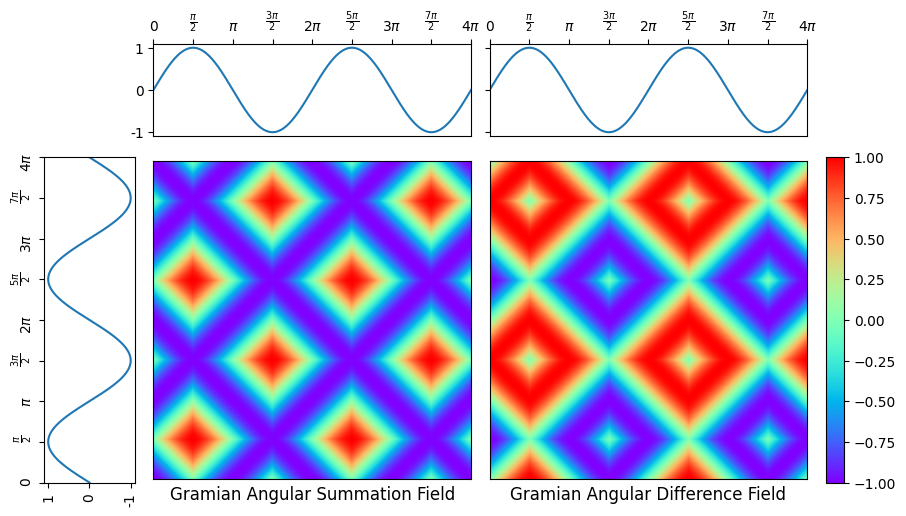

In [5]:
fig = plt.figure(figsize=(width, height))
gs = fig.add_gridspec(2, 4,  width_ratios=width_ratios,
                      height_ratios=height_ratios,
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.1, hspace=0.1)

# Define the ticks and their labels for both axes
time_ticks = np.linspace(0, 4 * np.pi, 9)
time_ticklabels = [r'$0$', r'$\frac{\pi}{2}$', r'$\pi$',
                   r'$\frac{3\pi}{2}$', r'$2\pi$', r'$\frac{5\pi}{2}$',
                   r'$3\pi$', r'$\frac{7\pi}{2}$', r'$4\pi$']
value_ticks = [-1, 0, 1]
reversed_value_ticks = value_ticks[::-1]

# Plot the time series on the left with inverted axes
ax_left = fig.add_subplot(gs[1, 0])
ax_left.plot(x, time_points)
ax_left.set_xticks(reversed_value_ticks)
ax_left.set_xticklabels(reversed_value_ticks, rotation=90)
ax_left.set_yticks(time_ticks)
ax_left.set_yticklabels(time_ticklabels, rotation=90)
ax_left.set_ylim((0, 4 * np.pi))
ax_left.invert_xaxis()

# Plot the time series on the top
ax_top1 = fig.add_subplot(gs[0, 1])
ax_top2 = fig.add_subplot(gs[0, 2])
for ax in (ax_top1, ax_top2):
    ax.plot(time_points, x)
    ax.set_xticks(time_ticks)
    ax.set_xticklabels(time_ticklabels)
    ax.set_yticks(value_ticks)
    ax.xaxis.tick_top()
    ax.set_xlim((0, 4 * np.pi))
ax_top1.set_yticklabels(value_ticks)
ax_top2.set_yticklabels([])

# Plot the Gramian angular fields on the bottom right
ax_gasf = fig.add_subplot(gs[1, 1])
ax_gasf.imshow(X_gasf[0], cmap='rainbow', origin='lower',
               extent=[0, 4 * np.pi, 0, 4 * np.pi])
ax_gasf.set_xticks([])
ax_gasf.set_yticks([])
ax_gasf.set_title('Gramian Angular Summation Field', y=-0.09)

ax_gadf = fig.add_subplot(gs[1, 2])
im = ax_gadf.imshow(X_gadf[0], cmap='rainbow', origin='lower',
                    extent=[0, 4 * np.pi, 0, 4 * np.pi])
ax_gadf.set_xticks([])
ax_gadf.set_yticks([])
ax_gadf.set_title('Gramian Angular Difference Field', y=-0.09)

# Add colorbar
ax_cbar = fig.add_subplot(gs[1, 3])
fig.colorbar(im, cax=ax_cbar)

plt.show()

In [6]:
from src.gaf import *

In [7]:
tau = 0
gaf0 = GAF(X, threshold=tau)
gs0 = gaf0.gasf()
gd0 = gaf0.gadf()

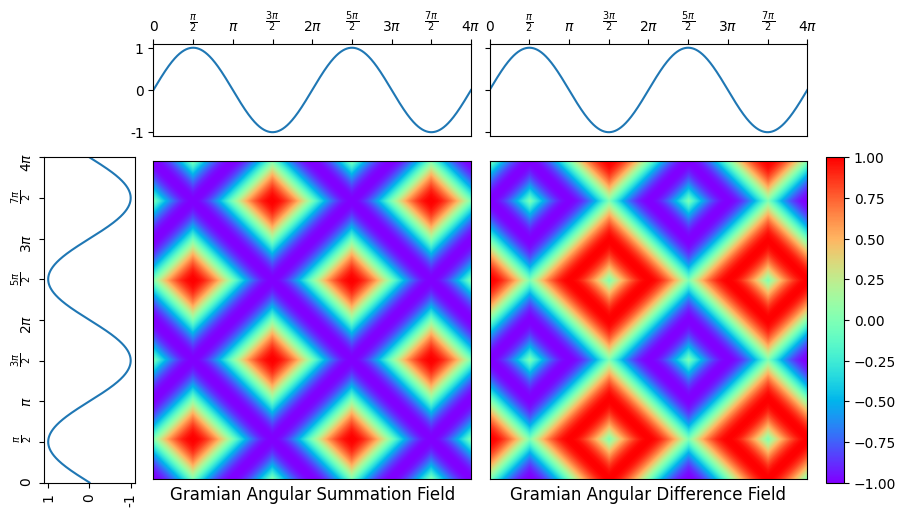

In [8]:
fig = plt.figure(figsize=(width, height))
gs = fig.add_gridspec(2, 4,  width_ratios=width_ratios,
                      height_ratios=height_ratios,
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.1, hspace=0.1)

# Define the ticks and their labels for both axes
time_ticks = np.linspace(0, 4 * np.pi, 9)
time_ticklabels = [r'$0$', r'$\frac{\pi}{2}$', r'$\pi$',
                   r'$\frac{3\pi}{2}$', r'$2\pi$', r'$\frac{5\pi}{2}$',
                   r'$3\pi$', r'$\frac{7\pi}{2}$', r'$4\pi$']
value_ticks = [-1, 0, 1]
reversed_value_ticks = value_ticks[::-1]

# Plot the time series on the left with inverted axes
ax_left = fig.add_subplot(gs[1, 0])
ax_left.plot(x, time_points)
ax_left.set_xticks(reversed_value_ticks)
ax_left.set_xticklabels(reversed_value_ticks, rotation=90)
ax_left.set_yticks(time_ticks)
ax_left.set_yticklabels(time_ticklabels, rotation=90)
ax_left.set_ylim((0, 4 * np.pi))
ax_left.invert_xaxis()

# Plot the time series on the top
ax_top1 = fig.add_subplot(gs[0, 1])
ax_top2 = fig.add_subplot(gs[0, 2])
for ax in (ax_top1, ax_top2):
    ax.plot(time_points, x)
    ax.set_xticks(time_ticks)
    ax.set_xticklabels(time_ticklabels)
    ax.set_yticks(value_ticks)
    ax.xaxis.tick_top()
    ax.set_xlim((0, 4 * np.pi))
ax_top1.set_yticklabels(value_ticks)
ax_top2.set_yticklabels([])

# Plot the Gramian angular fields on the bottom right
ax_gasf = fig.add_subplot(gs[1, 1])
ax_gasf.imshow(gs0, cmap='rainbow', origin='lower',
               extent=[0, 4 * np.pi, 0, 4 * np.pi])
ax_gasf.set_xticks([])
ax_gasf.set_yticks([])
ax_gasf.set_title('Gramian Angular Summation Field', y=-0.09)

ax_gadf = fig.add_subplot(gs[1, 2])
im = ax_gadf.imshow(gd0, cmap='rainbow', origin='lower',
                    extent=[0, 4 * np.pi, 0, 4 * np.pi])
ax_gadf.set_xticks([])
ax_gadf.set_yticks([])
ax_gadf.set_title('Gramian Angular Difference Field', y=-0.09)

# Add colorbar
ax_cbar = fig.add_subplot(gs[1, 3])
fig.colorbar(im, cax=ax_cbar)

plt.show()

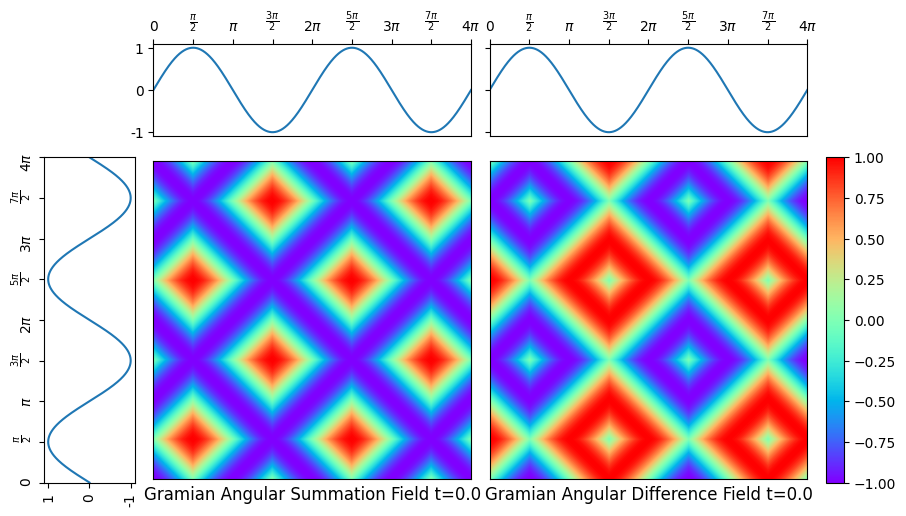

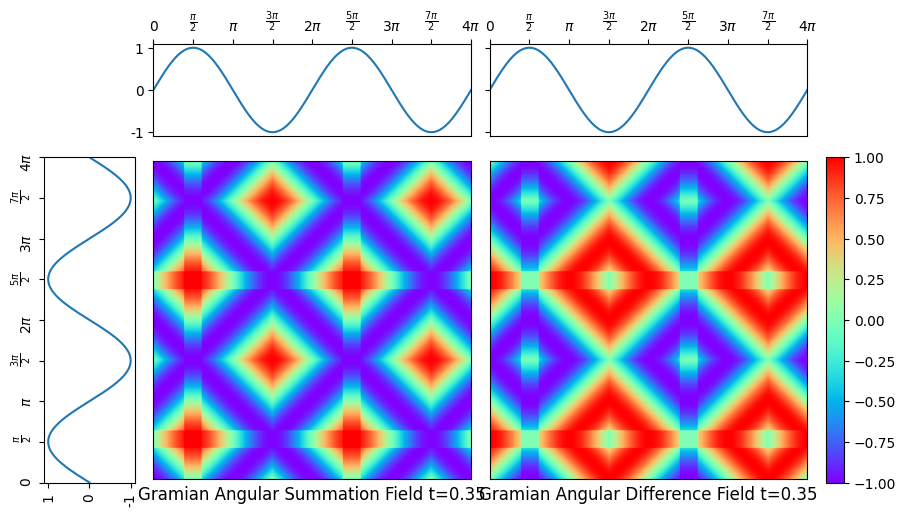

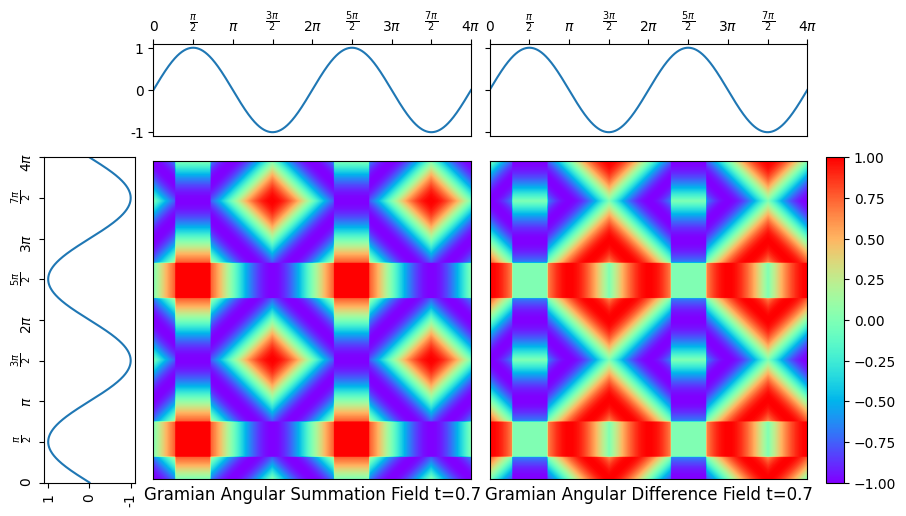

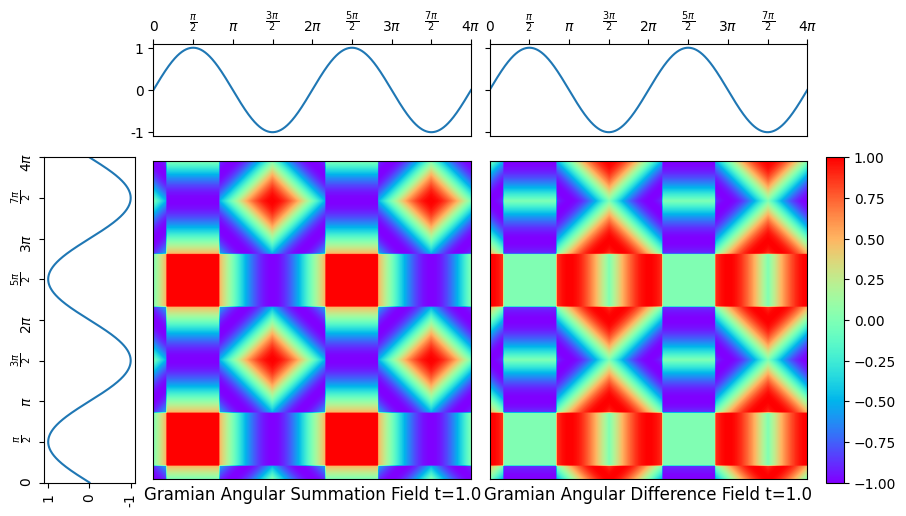

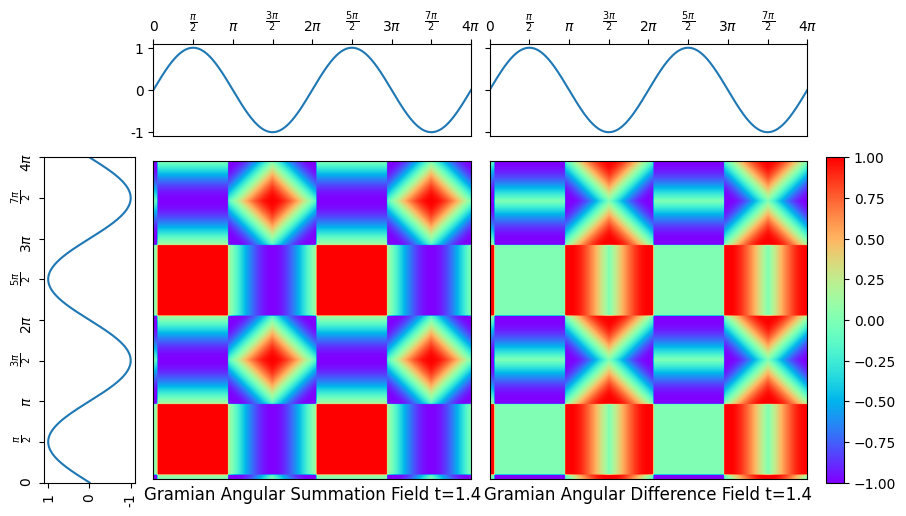

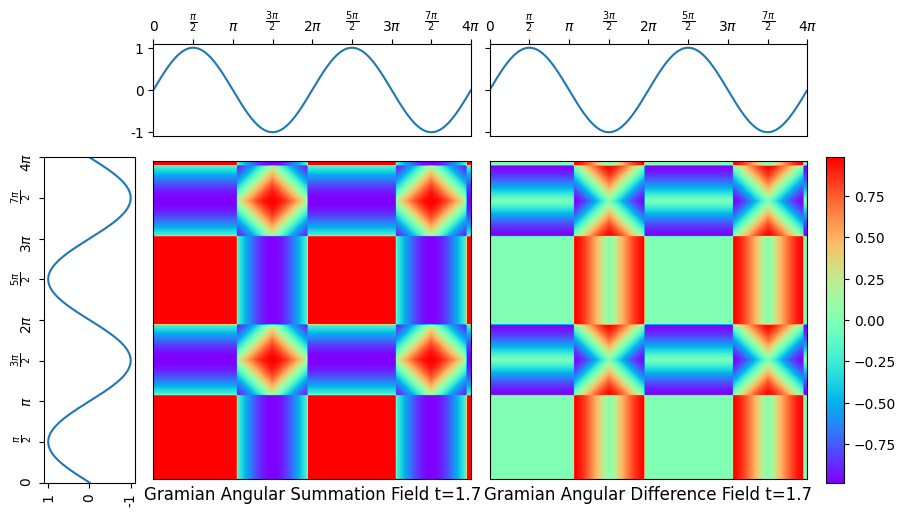

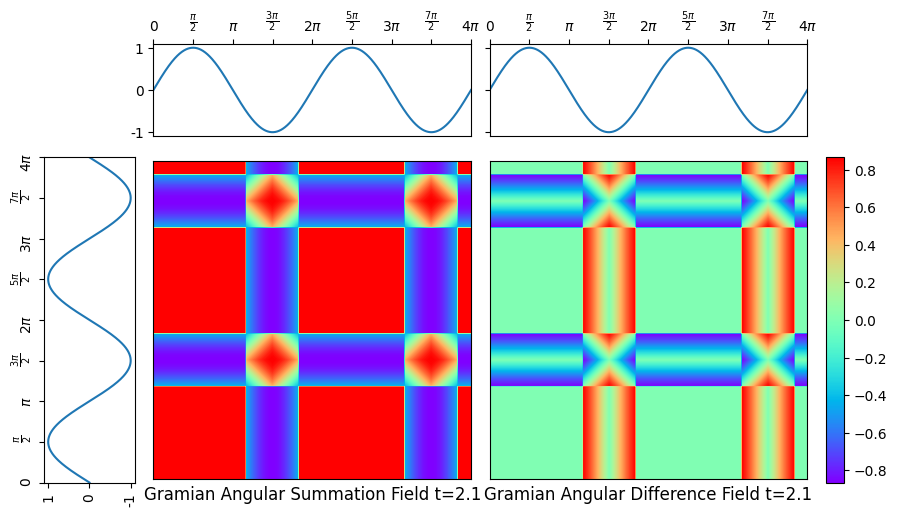

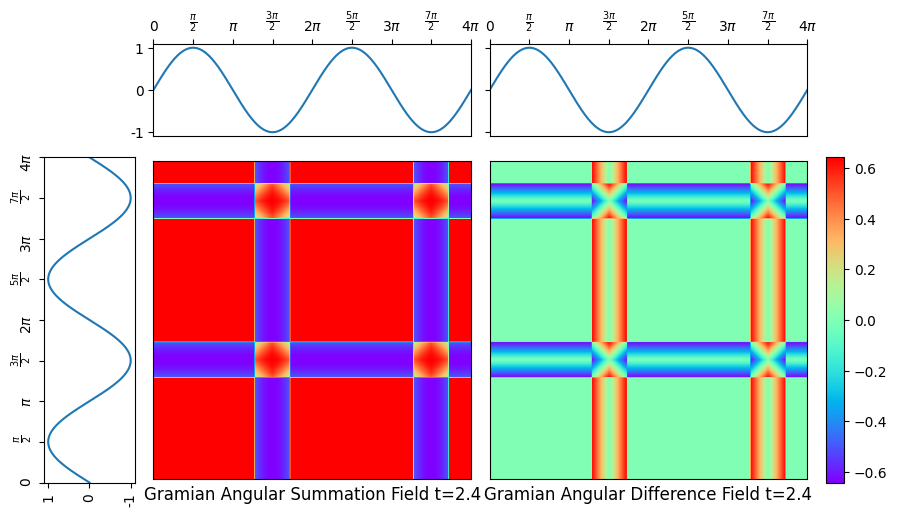

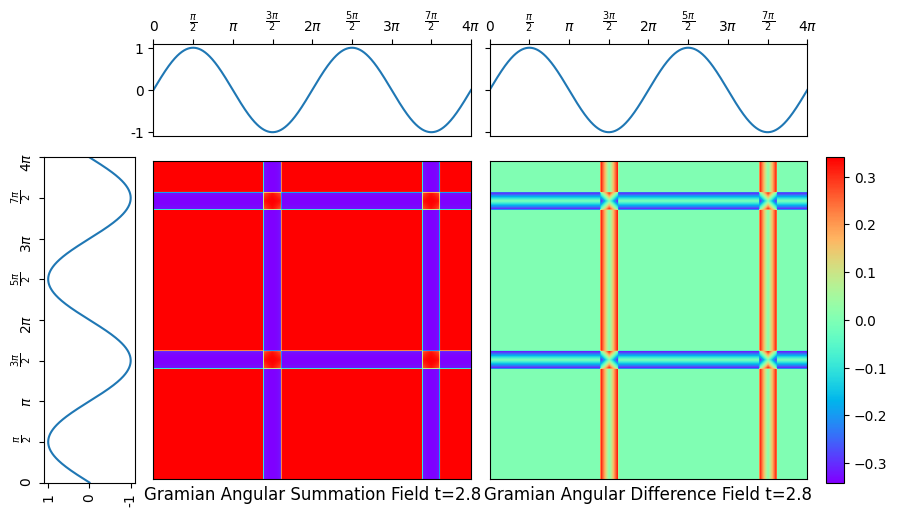

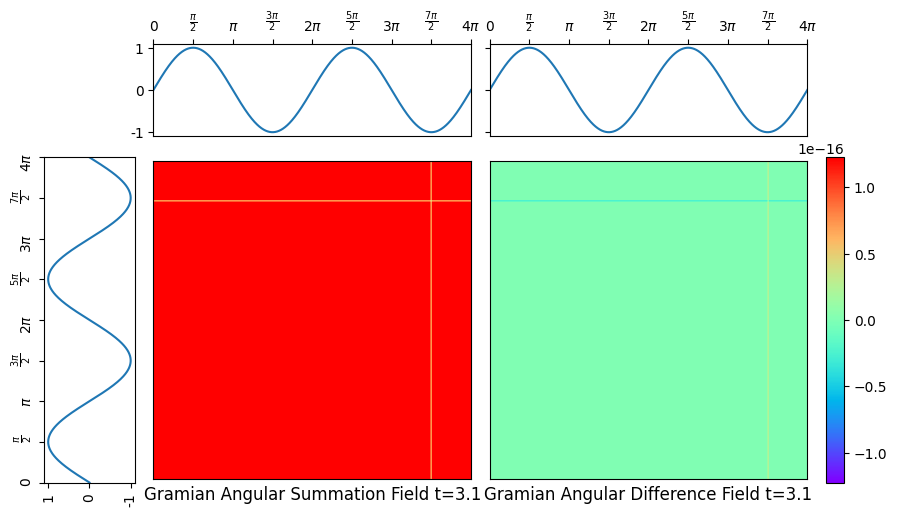

In [9]:
thresholds = np.linspace(0, np.pi, 10)
for tau in thresholds:
    gaf0 = GAF(X, threshold=tau)
    gs0 = gaf0.gasf()
    gd0 = gaf0.gadf()
    fig = plt.figure(figsize=(width, height))
    gs = fig.add_gridspec(2, 4,  width_ratios=width_ratios,
                        height_ratios=height_ratios,
                        left=0.1, right=0.9, bottom=0.1, top=0.9,
                        wspace=0.1, hspace=0.1)

    # Define the ticks and their labels for both axes
    time_ticks = np.linspace(0, 4 * np.pi, 9)
    time_ticklabels = [r'$0$', r'$\frac{\pi}{2}$', r'$\pi$',
                    r'$\frac{3\pi}{2}$', r'$2\pi$', r'$\frac{5\pi}{2}$',
                    r'$3\pi$', r'$\frac{7\pi}{2}$', r'$4\pi$']
    value_ticks = [-1, 0, 1]
    reversed_value_ticks = value_ticks[::-1]

    # Plot the time series on the left with inverted axes
    ax_left = fig.add_subplot(gs[1, 0])
    ax_left.plot(x, time_points)
    ax_left.set_xticks(reversed_value_ticks)
    ax_left.set_xticklabels(reversed_value_ticks, rotation=90)
    ax_left.set_yticks(time_ticks)
    ax_left.set_yticklabels(time_ticklabels, rotation=90)
    ax_left.set_ylim((0, 4 * np.pi))
    ax_left.invert_xaxis()

    # Plot the time series on the top
    ax_top1 = fig.add_subplot(gs[0, 1])
    ax_top2 = fig.add_subplot(gs[0, 2])
    for ax in (ax_top1, ax_top2):
        ax.plot(time_points, x)
        ax.set_xticks(time_ticks)
        ax.set_xticklabels(time_ticklabels)
        ax.set_yticks(value_ticks)
        ax.xaxis.tick_top()
        ax.set_xlim((0, 4 * np.pi))
    ax_top1.set_yticklabels(value_ticks)
    ax_top2.set_yticklabels([])

    # Plot the Gramian angular fields on the bottom right
    ax_gasf = fig.add_subplot(gs[1, 1])
    ax_gasf.imshow(gs0, cmap='rainbow', origin='lower',
                extent=[0, 4 * np.pi, 0, 4 * np.pi])
    ax_gasf.set_xticks([])
    ax_gasf.set_yticks([])
    ax_gasf.set_title(f'Gramian Angular Summation Field t={tau:.2}', y=-0.09)

    ax_gadf = fig.add_subplot(gs[1, 2])
    im = ax_gadf.imshow(gd0, cmap='rainbow', origin='lower',
                        extent=[0, 4 * np.pi, 0, 4 * np.pi])
    ax_gadf.set_xticks([])
    ax_gadf.set_yticks([])
    ax_gadf.set_title(f'Gramian Angular Difference Field t={tau:.2}', y=-0.09)

    # Add colorbar
    ax_cbar = fig.add_subplot(gs[1, 3])
    fig.colorbar(im, cax=ax_cbar)

    plt.show()

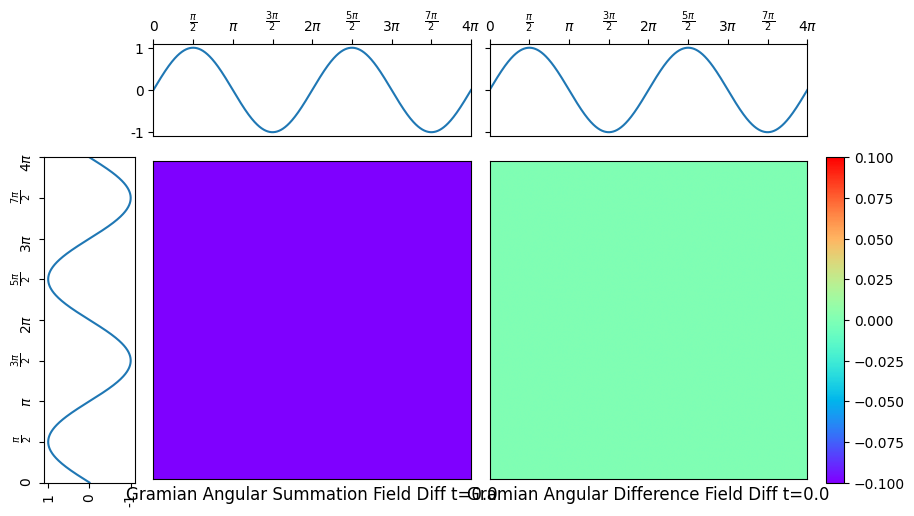

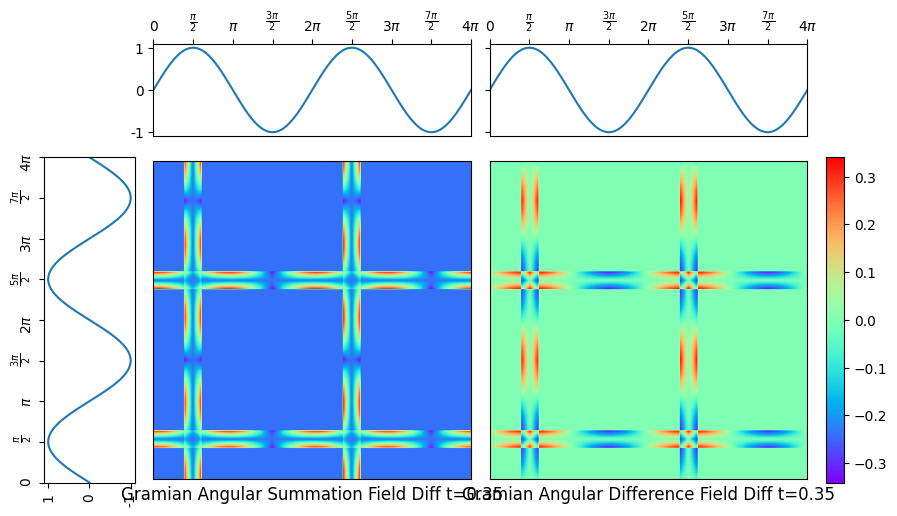

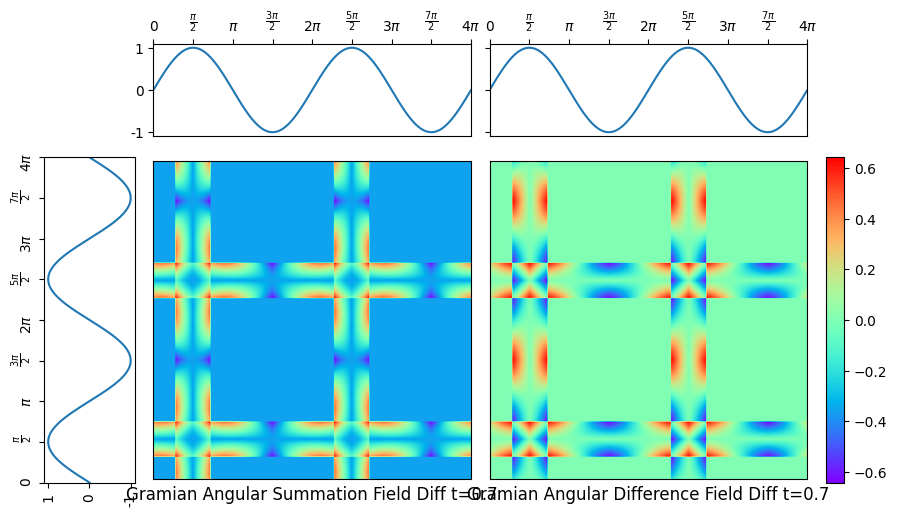

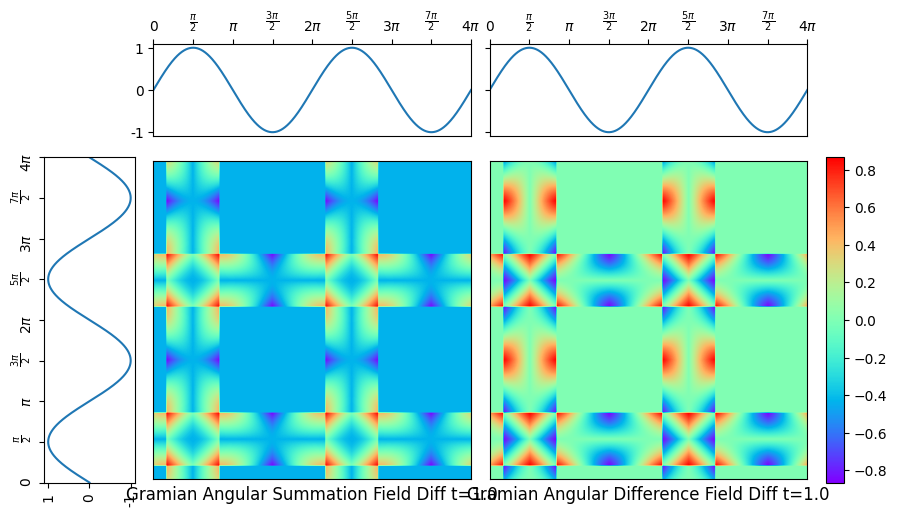

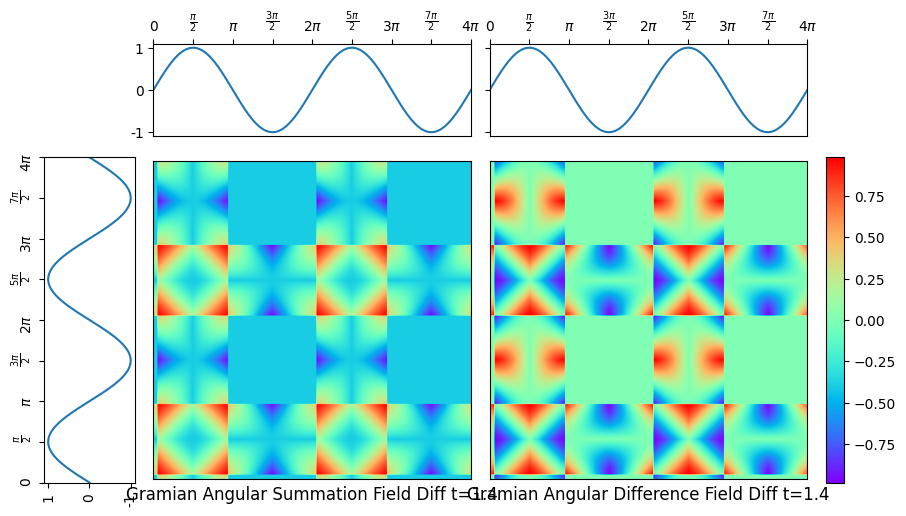

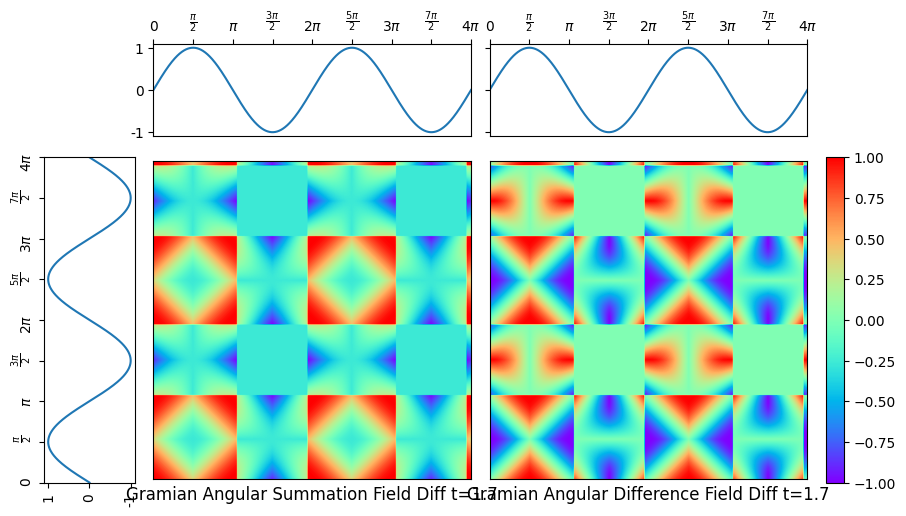

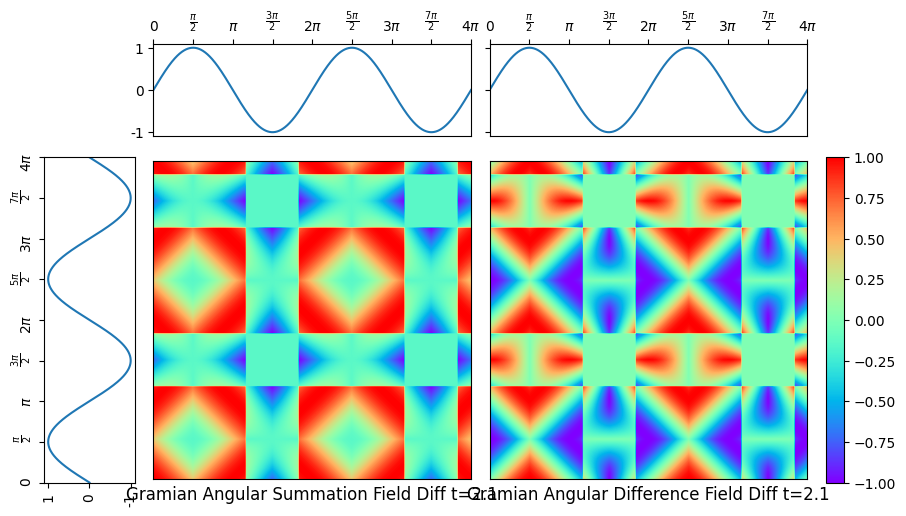

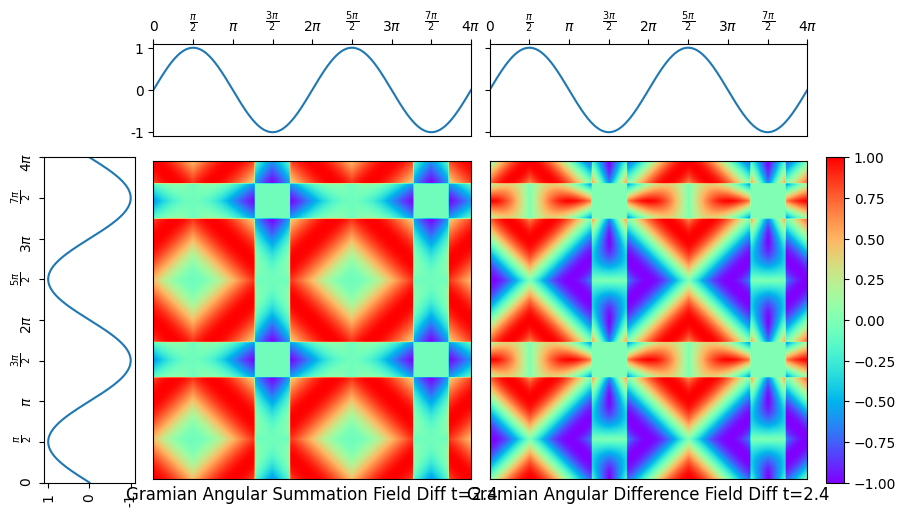

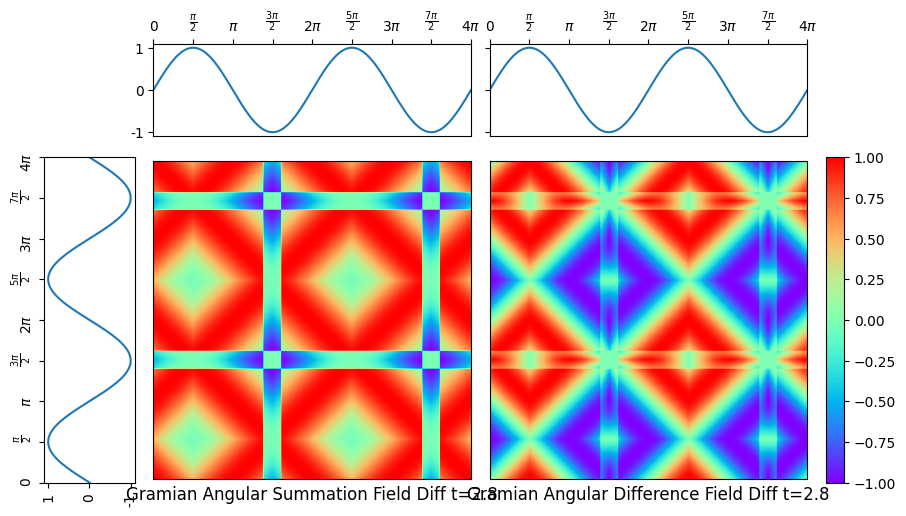

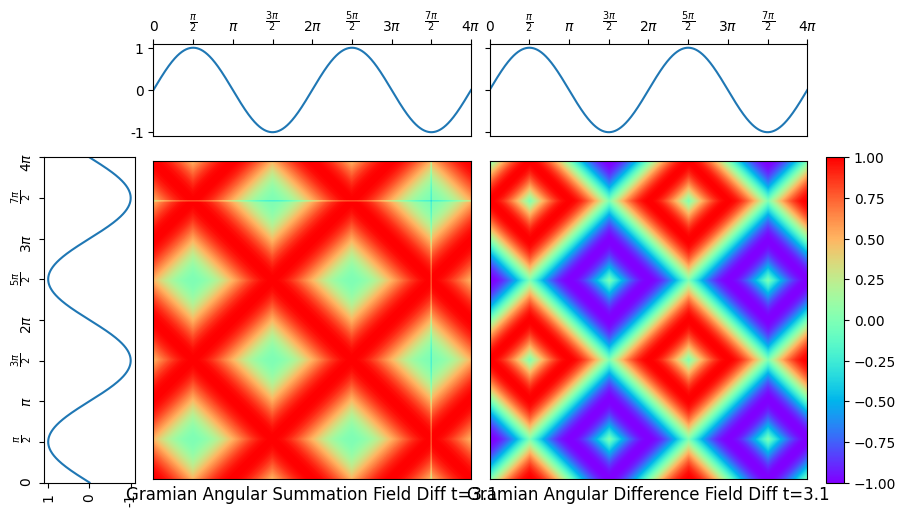

In [10]:
thresholds = np.linspace(0, np.pi, 10)
gaf0 = GAF(X, threshold=0)
gsi = gaf0.gasf()
gdi = gaf0.gadf()
for tau in thresholds:
    gaf0 = GAF(X, threshold=tau)
    gs0 = gaf0.gasf()
    gd0 = gaf0.gadf()
    fig = plt.figure(figsize=(width, height))
    gs = fig.add_gridspec(2, 4,  width_ratios=width_ratios,
                        height_ratios=height_ratios,
                        left=0.1, right=0.9, bottom=0.1, top=0.9,
                        wspace=0.1, hspace=0.1)

    # Define the ticks and their labels for both axes
    time_ticks = np.linspace(0, 4 * np.pi, 9)
    time_ticklabels = [r'$0$', r'$\frac{\pi}{2}$', r'$\pi$',
                    r'$\frac{3\pi}{2}$', r'$2\pi$', r'$\frac{5\pi}{2}$',
                    r'$3\pi$', r'$\frac{7\pi}{2}$', r'$4\pi$']
    value_ticks = [-1, 0, 1]
    reversed_value_ticks = value_ticks[::-1]

    # Plot the time series on the left with inverted axes
    ax_left = fig.add_subplot(gs[1, 0])
    ax_left.plot(x, time_points)
    ax_left.set_xticks(reversed_value_ticks)
    ax_left.set_xticklabels(reversed_value_ticks, rotation=90)
    ax_left.set_yticks(time_ticks)
    ax_left.set_yticklabels(time_ticklabels, rotation=90)
    ax_left.set_ylim((0, 4 * np.pi))
    ax_left.invert_xaxis()

    # Plot the time series on the top
    ax_top1 = fig.add_subplot(gs[0, 1])
    ax_top2 = fig.add_subplot(gs[0, 2])
    for ax in (ax_top1, ax_top2):
        ax.plot(time_points, x)
        ax.set_xticks(time_ticks)
        ax.set_xticklabels(time_ticklabels)
        ax.set_yticks(value_ticks)
        ax.xaxis.tick_top()
        ax.set_xlim((0, 4 * np.pi))
    ax_top1.set_yticklabels(value_ticks)
    ax_top2.set_yticklabels([])

    # Plot the Gramian angular fields on the bottom right
    ax_gasf = fig.add_subplot(gs[1, 1])
    ax_gasf.imshow(gs0-gsi, cmap='rainbow', origin='lower',
                extent=[0, 4 * np.pi, 0, 4 * np.pi])
    ax_gasf.set_xticks([])
    ax_gasf.set_yticks([])
    ax_gasf.set_title(f'Gramian Angular Summation Field Diff t={tau:.2}', y=-0.09)

    ax_gadf = fig.add_subplot(gs[1, 2])
    im = ax_gadf.imshow(gd0-gdi, cmap='rainbow', origin='lower',
                        extent=[0, 4 * np.pi, 0, 4 * np.pi])
    ax_gadf.set_xticks([])
    ax_gadf.set_yticks([])
    ax_gadf.set_title(f'Gramian Angular Difference Field Diff t={tau:.2}', y=-0.09)

    # Add colorbar
    ax_cbar = fig.add_subplot(gs[1, 3])
    fig.colorbar(im, cax=ax_cbar)

    plt.show()

In [11]:
np.max(X)

0.9999987638285974